In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (10,5)

print("Libraries imported.")


Libraries imported.


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
df = pd.read_csv(url, compression='gzip')

display(df.head())
print("\n--- info() ---")
df.info()
print("\n--- describe(include='all') ---")
display(df.describe(include='all'))


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918



--- info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB

--- describe(include='all') ---


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek  # 0=Monday ... 6=Sunday

display(df[['date_time','year','month','day','hour','dayofweek']].head())


,date_time,year,month,day,hour,dayofweek
0,2012-10-02 09:00:00,2012,10,2,9,1
1,2012-10-02 10:00:00,2012,10,2,10,1
2,2012-10-02 11:00:00,2012,10,2,11,1
3,2012-10-02 12:00:00,2012,10,2,12,1
4,2012-10-02 13:00:00,2012,10,2,13,1


In [ ]:
tv = df['traffic_volume']

mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().iloc[0]
std_tv = tv.std()
range_tv = tv.max() - tv.min()
min_tv, max_tv = tv.min(), tv.max()

print(f"Mean (المتوسط): {mean_tv:.2f}")
print(f"Median (الوسيط): {median_tv:.2f}")
print(f"Mode (الوضع): {mode_tv}")
print(f"Std (الانحراف المعياري): {std_tv:.2f}")
print(f"Range: {range_tv}  (min={min_tv}, max={max_tv})")


Mean (المتوسط): 3259.82
Median (الوسيط): 3380.00
Mode (الوضع): 353
Std (الانحراف المعياري): 1986.86
Range: 7280  (min=0, max=7280)


هنا الوسيط (3380) أكبر قليلاً من المتوسط (3259.82).

هذا يعني أن القيم الصغيرة أثرت في خفض المتوسط قليلًا.

وبالتالي يمكننا القول أن التوزيع منحاز قليلًا لليسار (سالب skew) لأن المتوسط < الوسيط.

النتيجة النهائية:

الوسيط هو 3380

المتوسط هو 3259.82

بما أن المتوسط أصغر من الوسيط → التوزيع منحاز لليسار (سالب skew)

In [ ]:
skew_tv = tv.skew()
kurt_tv = tv.kurtosis()
print(f"Skewness (الالتواء): {skew_tv:.4f}")
print(f"Kurtosis (التفرطح، Fisher): {kurt_tv:.4f}")
print("\nملاحظة: pandas .kurtosis() يعطي excess kurtosis (normal => 0). قيمة موجبة تعني ذيول أثخن من الطبيعي.")


Skewness (الالتواء): -0.0894
Kurtosis (التفرطح، Fisher): -1.3091

ملاحظة: pandas .kurtosis() يعطي excess kurtosis (normal => 0). قيمة موجبة تعني ذيول أثخن من الطبيعي.


قيمة الالتواء = -0.0894
هذا رقم قريب جدًا من الصفر وسالب قليلًا.
إذن:

التوزيع شبه متماثل تقريبًا، مع ميل بسيط جدًا نحو اليسار (سالب).

بمعنى آخر:
معظم القيم حول المتوسط، ولا توجد قيم شاذة كثيرة.

لتفرطح يقيس مدى ارتفاع أو تسطّح قمة التوزيع وسماكة الذيول (tails).
التوزيع مسطّح أكثر من الطبيعي (ذيول خفيفة).

بمعنى أن البيانات مركّزة أكثر في المنتصف ولا تحتوي على قيم متطرفة كثيرة.

In [ ]:
grp_weather = df.groupby('weather_main')['traffic_volume'].agg(['count','mean','std']).sort_values(by='mean', ascending=False)
display(grp_weather)

print("\nأعلى متوسط لحركة المرور حسب weather_main هو السطر الأول في الجدول أعلاه.")
print("أعلى تشتت (std) يظهر في العمود std؛ ابحثي عن أعلى قيمة.")


,count,mean,std
weather_main,,,
Clouds,15164,3618.449749,1906.202879
Haze,1360,3502.101471,1873.511057
Rain,5672,3317.905501,1982.228705
Drizzle,1821,3290.727073,1997.901830
Smoke,20,3237.650000,1978.015893
Clear,13391,3055.908819,1987.101411
Snow,2876,3016.844228,1900.185883
Thunderstorm,1034,3001.620890,1988.296012
Mist,5950,2932.956639,2073.025670



أعلى متوسط لحركة المرور حسب weather_main هو السطر الأول في الجدول أعلاه.
أعلى تشتت (std) يظهر في العمود std؛ ابحثي عن أعلى قيمة.



أعلى متوسط (mean)	Clouds (3618.45)	أكثر حركة مرور في الطقس الغائم
أعلى تشتّت (std)	Fog (2125.53)	أكثر تفاوت في حركة المرور أثناء الضباب

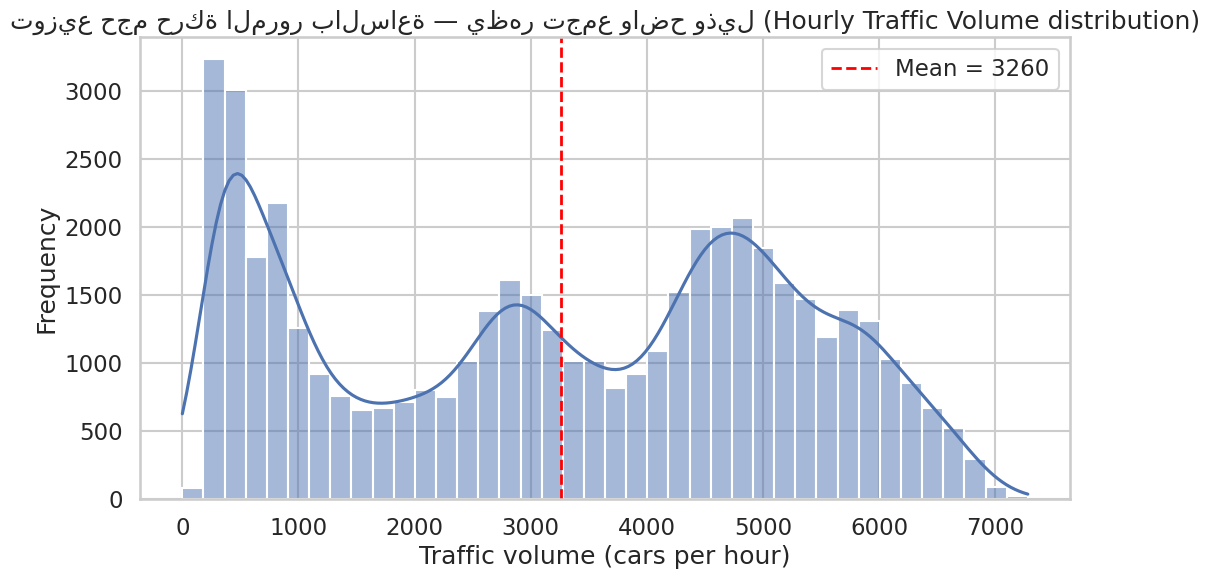

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(tv, bins=40, kde=True)
plt.axvline(mean_tv, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_tv:.0f}')
plt.title("توزيع حجم حركة المرور بالساعة — يظهر تجمع واضح وذيل (Hourly Traffic Volume distribution)")
plt.xlabel("Traffic volume (cars per hour)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


متوسط عدد السيارات في الساعه

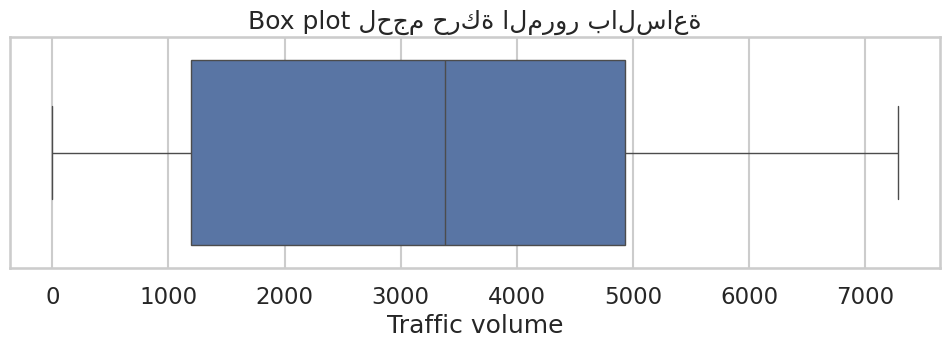

Q1 = 1193.00, Q3 = 4933.00, IQR = Q3-Q1 = 3740.00
IQR مقارنة بالانحراف المعياري: IQR=3740.00, Std=1986.86


In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x=tv)
plt.title("Box plot لحجم حركة المرور بالساعة")
plt.xlabel("Traffic volume")
plt.show()

Q1 = tv.quantile(0.25)
Q3 = tv.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = Q3-Q1 = {IQR:.2f}")
print(f"IQR مقارنة بالانحراف المعياري: IQR={IQR:.2f}, Std={std_tv:.2f}")


IQR > Std → القيم الوسطى منتشرة بشكل واسع نسبيًا.
البيانات ليست متجمعة بشدة حول المتوسط، مما يدل على تفاوت ملحوظ في عدد السيارات في الساعات المختلفة.

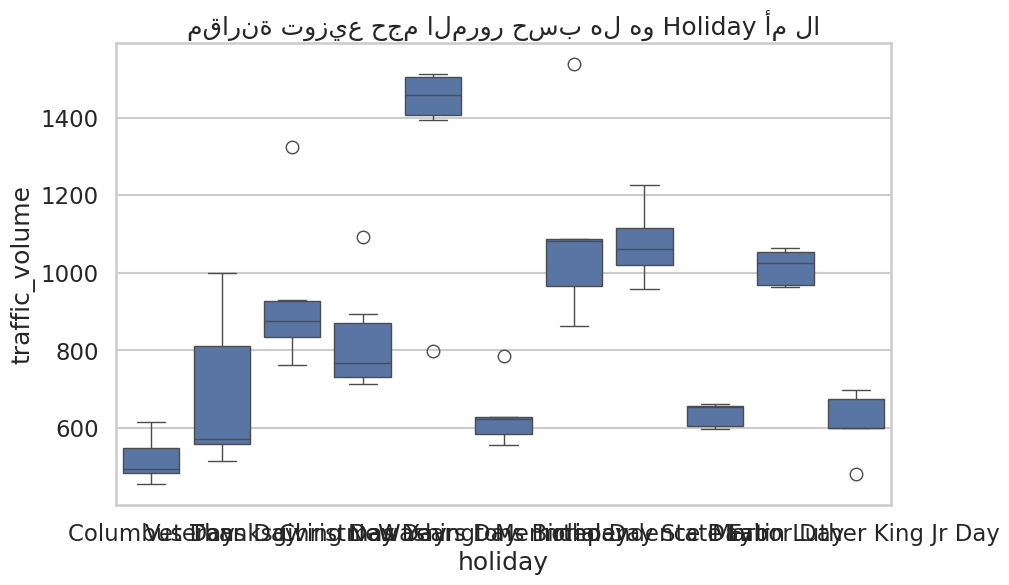

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df)
plt.title("مقارنة توزيع حجم المرور حسب هل هو Holiday أم لا")
plt.xlabel("holiday")
plt.ylabel("traffic_volume")
plt.show()


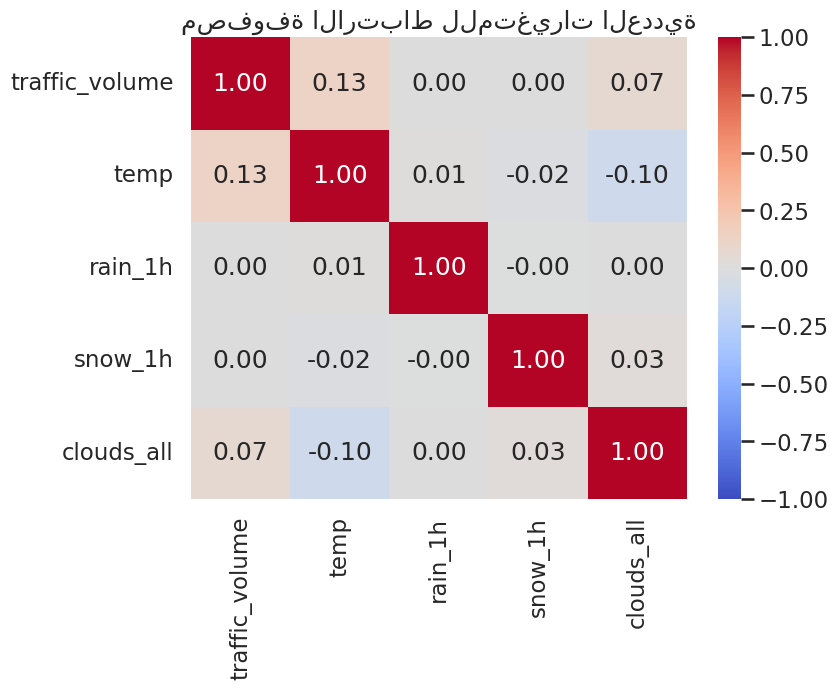


قِيّم الارتباط المطلقة مع traffic_volume:
traffic_volume    1.000000
temp              0.130299
clouds_all        0.067054
rain_1h           0.004714
snow_1h           0.000733
Name: traffic_volume, dtype: float64


In [ ]:
num_cols = ['traffic_volume','temp','rain_1h','snow_1h','clouds_all']
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("مصفوفة الارتباط للمتغيرات العددية")
plt.show()

print("\nقِيّم الارتباط المطلقة مع traffic_volume:")
print(corr['traffic_volume'].abs().sort_values(ascending=False))
